In [26]:
import os
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import joblib
import numpy as np
import warnings 
warnings.simplefilter('ignore')
os.listdir('../data')

['dataset.pkl',
 'PA_201605-2020001更新R10(20200602).csv',
 'tag_cleaned.csv',
 'tag盤點表20200423.xlsx',
 'tag盤點表20200602R1.xlsx',
 'train_cleaned.csv',
 '反應槽(20200201-20200212)開車資料.csv']

時間對入料和出料


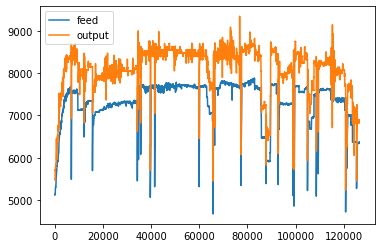

入料對出料


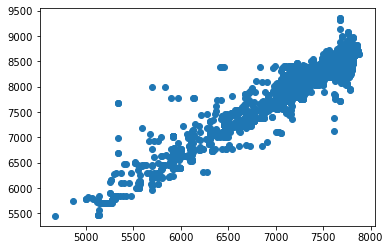

In [27]:
data = joblib.load('../data/dataset.pkl')
action = np.array([data['mm_action'].inverse_transform(i) for i in data['action']])
stream = data['mm_stream'].inverse_transform(data['stream'])
feed = action[:,0,0]
output = data['mm_output'].inverse_transform(data['output']).reshape(-1)
plt.plot(feed,label='feed')
plt.plot(output,label='output')
plt.legend()
print('時間對入料和出料')
plt.show()

idx = np.random.randint(100000,size=10000)
plt.scatter(feed[:-1585][idx],output[:-1585][idx])
print('入料對出料')
plt.show()

入料對出料


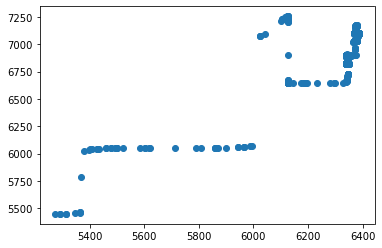

In [28]:
idx = np.random.randint(1585,size=1000)
plt.scatter(feed[-1585:][idx],output[-1585:][idx])
print('入料對出料')
plt.show()

時間對單耗


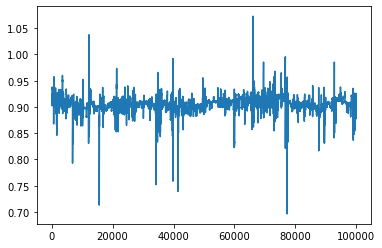

入料對單耗


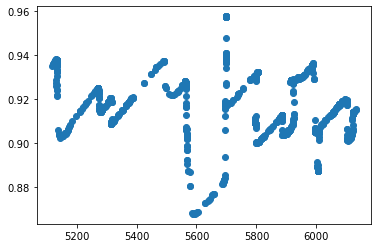

In [30]:
n = 100000
target = feed[:n]/output[:n]
print('時間對單耗')
plt.plot(target)
plt.show()
plt.scatter(feed[idx],target[idx])
print('入料對單耗')
plt.show()

# load tag

In [4]:
tag = pd.read_csv('../data/tag_cleaned.csv',index_col=0)
tag[tag.chinese.str.contains('蒸氣') == True]

,item,TAG,chinese,character,unit,category,period,min,max,推測顯著性(依製程經驗)
27,28.0,MLPAP_FR-0755PV(轉換後),反應槽16K蒸氣輸出,流量,T/HR,不可控制因子,1分鐘2筆,0,25,***
28,29.0,MLPAP_FR-0791.PV,反應槽50K蒸氣輸出,流量,T/HR,不可控制因子,1分鐘2筆,10,35,***
29,30.0,MLPAP_FI-V211.PV(轉換後),副反應槽蒸氣輸出,流量,KG/HR,不可控制因子,1分鐘2筆,0,6900,***


In [5]:
temp_col = tag[tag.chinese.str.contains('鹽浴') == True][tag['category']=='可控制因子']
temp_col

,item,TAG,chinese,character,unit,category,period,min,max,推測顯著性(依製程經驗)
4,5.0,MLPAP_TJC-0757A.PV,反應槽鹽浴溫度,溫度,℃,可控制因子,1分鐘2筆,345,365,****
7,8.0,MLPAP_PIC-0761.PV,鹽浴冷卻器(E112)出口壓力,壓力,BAR,可控制因子,1分鐘2筆,40,55,***
8,9.0,MLPAP_TRC-0762.PV,鹽浴冷卻器(E112)入口溫度,溫度,℃,可控制因子,1分鐘2筆,345,365,***
88,89.0,MLPAP_TJC-0757.PV,反應器A/B側鹽浴溫度差,溫度,℃,可控制因子,1分鐘2筆,-3,3,***
94,5.0,MLPAP_TJ-0757B.PV,反應槽鹽浴溫度,溫度,℃,可控制因子,1分鐘2筆,345,365,****


In [6]:
temp_col = temp_col.TAG.values.tolist()
temp_col

['MLPAP_TJC-0757A.PV',
 'MLPAP_PIC-0761.PV',
 'MLPAP_TRC-0762.PV',
 'MLPAP_TJC-0757.PV',
 'MLPAP_TJ-0757B.PV']

In [7]:
tag[tag.TAG.str.contains('0997') == True]

,item,TAG,chinese,character,unit,category,period,min,max,推測顯著性(依製程經驗)
25,26.0,MLPAP_FQI-0997.PV,粗PA出料量,流量,KG/HR,不可控制因子,1分鐘2筆,5000,10000,***


In [8]:
tag[tag.TAG.str.contains('0619') == True]

,item,TAG,chinese,character,unit,category,period,min,max,推測顯著性(依製程經驗)
3,4.0,MLPAP_FQ-0619.PV,OX入料量,流量,kg/HR,可控制因子,1分鐘2筆,2000,8000,****


In [9]:
tag[tag.chinese.str.contains('反應槽溫度') == True]

,item,TAG,chinese,character,unit,category,period,min,max,推測顯著性(依製程經驗)
30,31.0,MLPAP_TJ-0706B02,反應槽溫度_多點式(高度 250),溫度,℃,不可控制因子,1分鐘2筆,340,450,***
31,32.0,MLPAP_TJ-0706B03,反應槽溫度_多點式(高度 350),溫度,℃,不可控制因子,1分鐘2筆,340,450,***
32,33.0,MLPAP_TJ-0706B04,反應槽溫度_多點式(高度 450),溫度,℃,不可控制因子,1分鐘2筆,340,450,***
33,34.0,MLPAP_TJ-0706B05,反應槽溫度_多點式(高度 550),溫度,℃,不可控制因子,1分鐘2筆,340,450,***
34,35.0,MLPAP_TJ-0706B06,反應槽溫度_多點式(高度 650),溫度,℃,不可控制因子,1分鐘2筆,340,450,***
35,36.0,MLPAP_TJ-0706B07,反應槽溫度_多點式(高度 750),溫度,℃,不可控制因子,1分鐘2筆,340,450,***
36,37.0,MLPAP_TJ-0706B08,反應槽溫度_多點式(高度 850),溫度,℃,不可控制因子,1分鐘2筆,340,450,***
37,38.0,MLPAP_TJ-0706B09,反應槽溫度_多點式(高度 950),溫度,℃,不可控制因子,1分鐘2筆,340,450,***
38,39.0,MLPAP_TJ-0706B10,反應槽溫度_多點式(高度 1050),溫度,℃,不可控制因子,1分鐘2筆,340,450,***
39,40.0,MLPAP_TJ-0706B11,反應槽溫度_多點式(高度 1150),溫度,℃,不可控制因子,1分鐘2筆,340,450,***


# load df

In [10]:
df = pd.read_csv('../data/train_cleaned.csv',index_col=0)

# kde

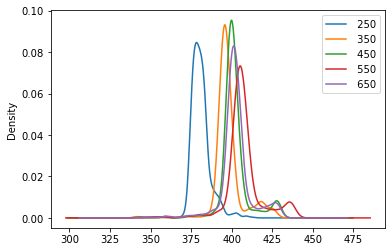

In [11]:
for i in tag[tag.chinese.str.contains('反應槽溫度') == True].TAG.values[:5]:
    h = tag.loc[tag.TAG==i,'chinese'].values[0].split('高度')[1][:-1]
    df[i].sample(1000).plot(kind='kde',label=h)
plt.legend()
plt.show()

# RAW

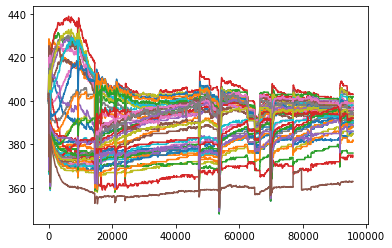

In [12]:
col = tag[tag.chinese.str.contains('反應槽溫度') == True].TAG.values
X = df[col].dropna(axis=0)
plt.plot(X.values)

# PCA

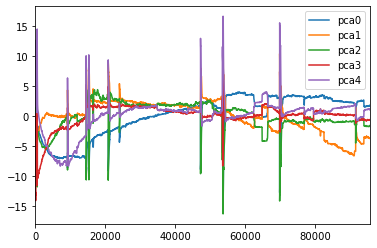

In [13]:
from sklearn.decomposition import SparsePCA
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
pca = SparsePCA(n_components=5)

X = ss.fit_transform(X)
X = pca.fit_transform(X)

X = pd.DataFrame(X,columns=['pca{}'.format(i) for i in range(5)])
X.plot()

In [14]:
pca.components_

array([[ 3.05601752e-02,  1.71495333e-02,  0.00000000e+00,
        -2.13455577e-02, -1.50533373e-02, -5.58564855e-03,
        -5.58149347e-04,  0.00000000e+00,  8.19813366e-02,
         1.65431348e-01,  2.41054987e-01,  2.61333886e-01,
         2.69899226e-01,  2.69028640e-01,  2.58933115e-01,
         2.34961098e-01,  1.92615783e-01,  1.49759703e-01,
         1.05780950e-01,  8.51412405e-02,  0.00000000e+00,
        -3.84225469e-02, -9.02512508e-02,  0.00000000e+00,
         1.12296056e-02,  0.00000000e+00, -1.12508609e-02,
        -1.00305283e-02, -1.00282617e-02, -2.90784822e-02,
        -3.16603079e-02,  0.00000000e+00,  5.49285324e-02,
         1.78962820e-01,  2.42893730e-01,  2.54788535e-01,
         2.47737069e-01,  2.56119583e-01,  2.46081825e-01,
         2.24058475e-01,  1.84022525e-01,  1.47224457e-01,
         1.31512751e-01,  9.73892887e-02,  3.40547880e-02,
        -5.73140702e-03],
       [-2.11072219e-03,  2.86233843e-02,  3.11618514e-02,
         2.69688657e-02, -4.60

In [15]:
import numpy as np
np.round(pca.components_,2)

array([[ 0.03,  0.02,  0.  , -0.02, -0.02, -0.01, -0.  ,  0.  ,  0.08,
         0.17,  0.24,  0.26,  0.27,  0.27,  0.26,  0.23,  0.19,  0.15,
         0.11,  0.09,  0.  , -0.04, -0.09,  0.  ,  0.01,  0.  , -0.01,
        -0.01, -0.01, -0.03, -0.03,  0.  ,  0.05,  0.18,  0.24,  0.25,
         0.25,  0.26,  0.25,  0.22,  0.18,  0.15,  0.13,  0.1 ,  0.03,
        -0.01],
       [-0.  ,  0.03,  0.03,  0.03, -0.  , -0.01, -0.07, -0.01,  0.02,
         0.04,  0.  , -0.05, -0.03, -0.03, -0.06, -0.11, -0.18, -0.22,
        -0.26, -0.3 , -0.36, -0.36, -0.3 , -0.05, -0.03, -0.  ,  0.  ,
         0.  ,  0.01,  0.  ,  0.  ,  0.  ,  0.02,  0.01,  0.  ,  0.01,
        -0.  ,  0.01, -0.08, -0.13, -0.19, -0.22, -0.26, -0.3 , -0.33,
        -0.08],
       [-0.12, -0.07, -0.03,  0.  ,  0.02,  0.04,  0.15,  0.39,  0.37,
         0.28,  0.13,  0.02,  0.02,  0.01,  0.  , -0.02, -0.05, -0.05,
        -0.04, -0.02,  0.06,  0.08,  0.07, -0.12, -0.12, -0.09, -0.06,
        -0.04, -0.02,  0.06,  0.27,  0.39,  0